Simple regression model


In [56]:
import pandas as pd

data = pd.read_csv('/content/housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Let's create histogram

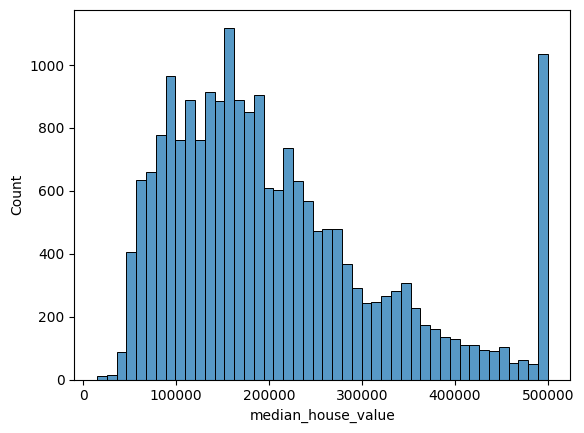

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['median_house_value'])
plt.show()

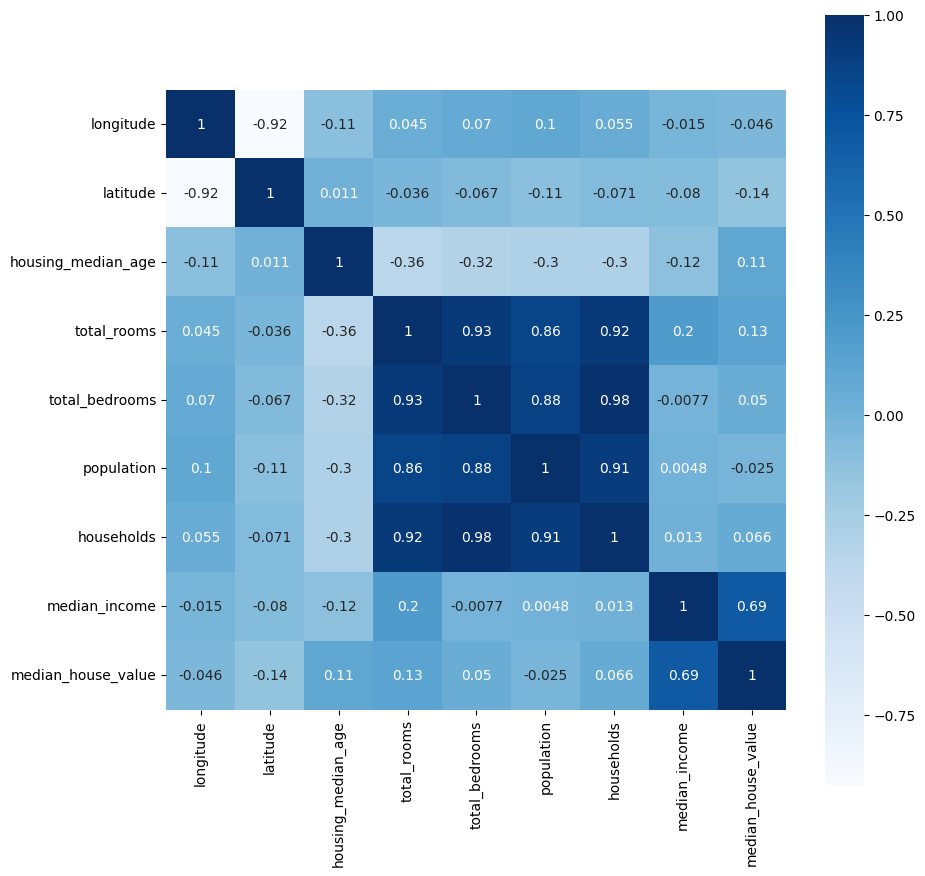

In [87]:
correlation = data.select_dtypes(include=['float64', 'int64']).corr(method='pearson')


plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')
plt.show()

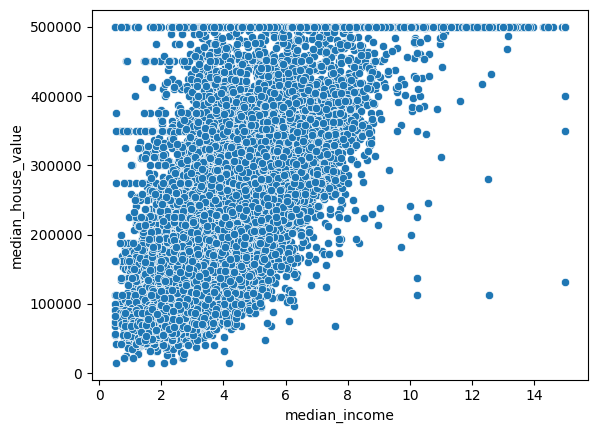

In [88]:
X = data['median_income']
y = data['median_house_value']

import seaborn as sns
import pandas as pd

data_visualize = pd.DataFrame({"median_income": X, "median_house_value": y})
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512,)
(4128,)
(16512,)
(4128,)


In [58]:
print(data.shape) #shows the values and columns of the dataset
print(data.columns.tolist())

(20640, 10)
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [59]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [60]:
!pip install scikit-learn

In [90]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

Let's use linear regression algorithm

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [95]:
y_pred = model.predict(X_test.values.reshape(-1,1))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_transformed, y_pred)
print("MSE:", mse)

MSE: 87.90581581394004


In [98]:
rmse = mean_squared_error(y_test_transformed, y_pred)
print("RMSE:", rmse)

RMSE: 87.90581581394004


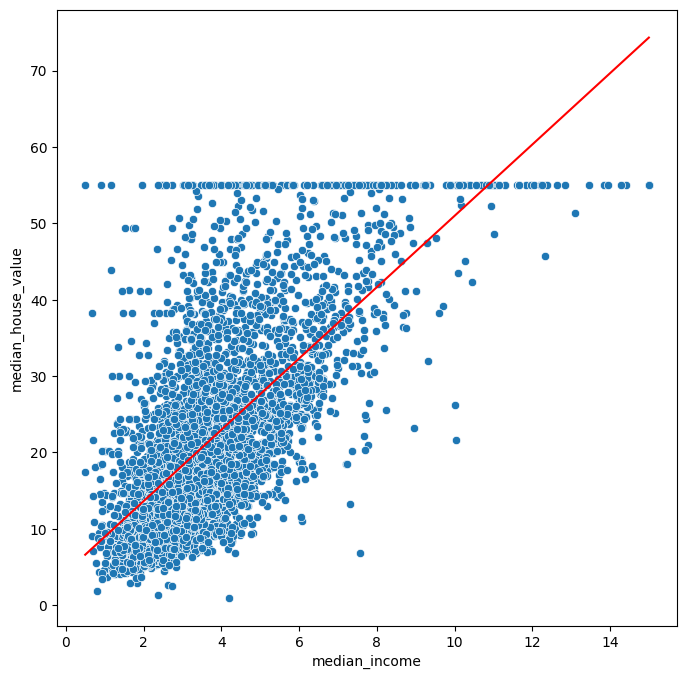

In [99]:
test_true = pd.DataFrame({'median_income': X_test, 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test, 'median_house_value': y_pred})

fig = plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")
plt.show()

In [100]:
rmse = mean_squared_error(y_test_transformed, y_pred)
print("RMSE:", rmse)

RMSE: 87.90581581394004


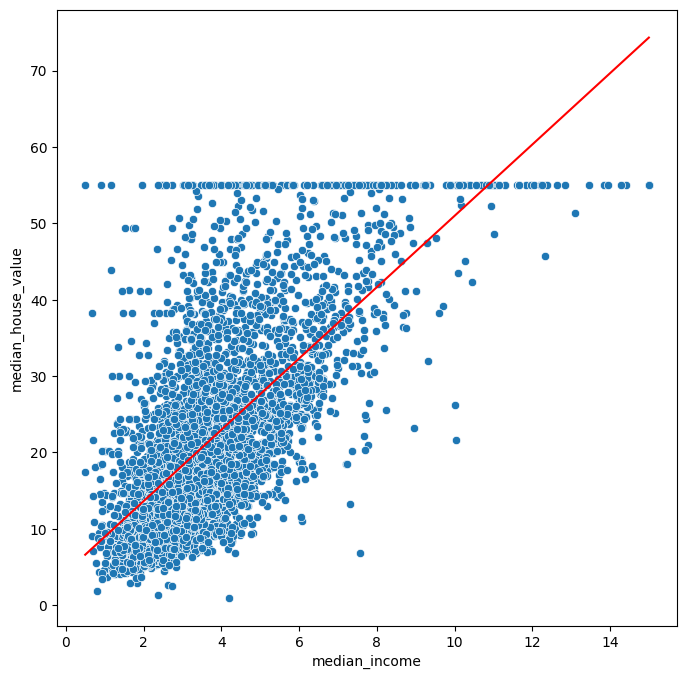

In [101]:
test_true = pd.DataFrame({'median_income': X_test, 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test, 'median_house_value': y_pred})

fig = plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")
plt.show()